<a href="https://colab.research.google.com/github/AlfredoFarro/TF-201911924/blob/main/Hito1/TF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
##from google.colab import drive
##drive.mount('/content/drive')
!wget -O Lima-intersecciones.csv https://raw.githubusercontent.com/AlfredoFarro/TF-201911924/main/Data/Lima-intersecciones.csv
!wget -O Lima-calles.csv https://raw.githubusercontent.com/AlfredoFarro/TF-201911924/main/Data/Lima-calles.csv

--2022-06-18 21:35:47--  https://raw.githubusercontent.com/AlfredoFarro/TF-201911924/main/Data/Lima-intersecciones.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 12107428 (12M) [text/plain]
Saving to: ‘Lima-intersecciones.csv’

Lima-intersecciones 100%[===================>]  11.55M  --.-KB/s    in 0.1s    

2022-06-18 21:35:48 (111 MB/s) - ‘Lima-intersecciones.csv’ saved [12107428/12107428]

--2022-06-18 21:35:48--  https://raw.githubusercontent.com/AlfredoFarro/TF-201911924/main/Data/Lima-calles.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.111.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting resp

In [ ]:
import pandas as pd
import json

calles = pd.read_csv("Lima-calles.csv",encoding='latin-1')

inter= pd.read_csv("Lima-intersecciones.csv",encoding='latin-1').iloc[0:10]
inter

In [11]:
df = inter[['Nombre_Calle','ID_Origen_intereccion','ID_Final_Interseccion','Item','Latitud_Origen_Interseccion','Longitud_Origen_Interseccion','Latitud_Destino_Interseccion',	'Longitud_Destino_Interseccion']]

adj1 = {}

for i,row in df.iterrows():
    act = int(row['Item'])
    origen = int(row['ID_Origen_intereccion'])
    origenla = float(row['Latitud_Origen_Interseccion'])
    origenlo = float(row['Longitud_Origen_Interseccion'])
    final = int(row['ID_Final_Interseccion'])
    finalla = float(row['Latitud_Destino_Interseccion'])
    finallo = float(row['Longitud_Destino_Interseccion'])
    distancia = calcdist(origenlo,finallo,origenla,finalla)
     
    if origen not in adj1:
        adj1[origen]=[]
    if final not in adj1:
        adj1[final]=[]
    if act not in adj1:
      adj1[act]=[]
    adj1[act]+=[origen,origenla,origenlo, final,finalla,finallo,distancia]
    

Lista de Adyacencia

In [12]:
json.dumps(adj1)

'{"1": [1, -12.0459308, -77.0427831, 6, -12.0460958, -77.0430896, 0.0003480908645805768], "6": [7, -12.0466783, -77.0430483, 10, -12.0466949, -77.042435, 0.0006135246123809542], "90275": [], "2": [6, -12.0460958, -77.0430896, 90275, -12.0461253, -77.0431113, 3.662157834146503e-05], "79": [], "3": [90275, -12.0461253, -77.0431113, 79, -12.0462768, -77.0431753, 0.00016446352178872104], "51668": [], "4": [79, -12.0462768, -77.0431753, 51668, -12.0466033, -77.0431118, 0.0003326176483583274], "7": [10, -12.0466949, -77.042435, 89757, -12.0465202, -77.0423222, 0.00020795174920979428], "5": [51668, -12.0466033, -77.0431118, 7, -12.0466783, -77.0430483, 9.827130812909455e-05], "10": [3472, -12.0462019, -77.0423251, 2, -12.0459528, -77.0425923, 0.0003653035039494085], "89757": [], "3473": [], "8": [89757, -12.0465202, -77.0423222, 3473, -12.0464537, -77.0423023, 6.941368740962515e-05], "3472": [], "9": [3473, -12.0464537, -77.0423023, 3472, -12.0462019, -77.0423251, 0.0002528301406088621]}'

In [13]:
def is_integer_num(n):
    if isinstance(n, int):
        return True
    if isinstance(n, float):
        return n.is_integer()
    return False

El siguiente cógido falta implementar.

In [ ]:
##FALTA IMPLEMENTAR

"""
a=[]
def caminos(inicio,final):
  for key in adj1:
    if key==inicio:
      for item in adj1[key]:
         if is_integer_num(item)==True and item !=0:
          a.append(item)
    if key==final: 
      break
    
  

caminos(1,79)
"""


Graficar mapa de Lima

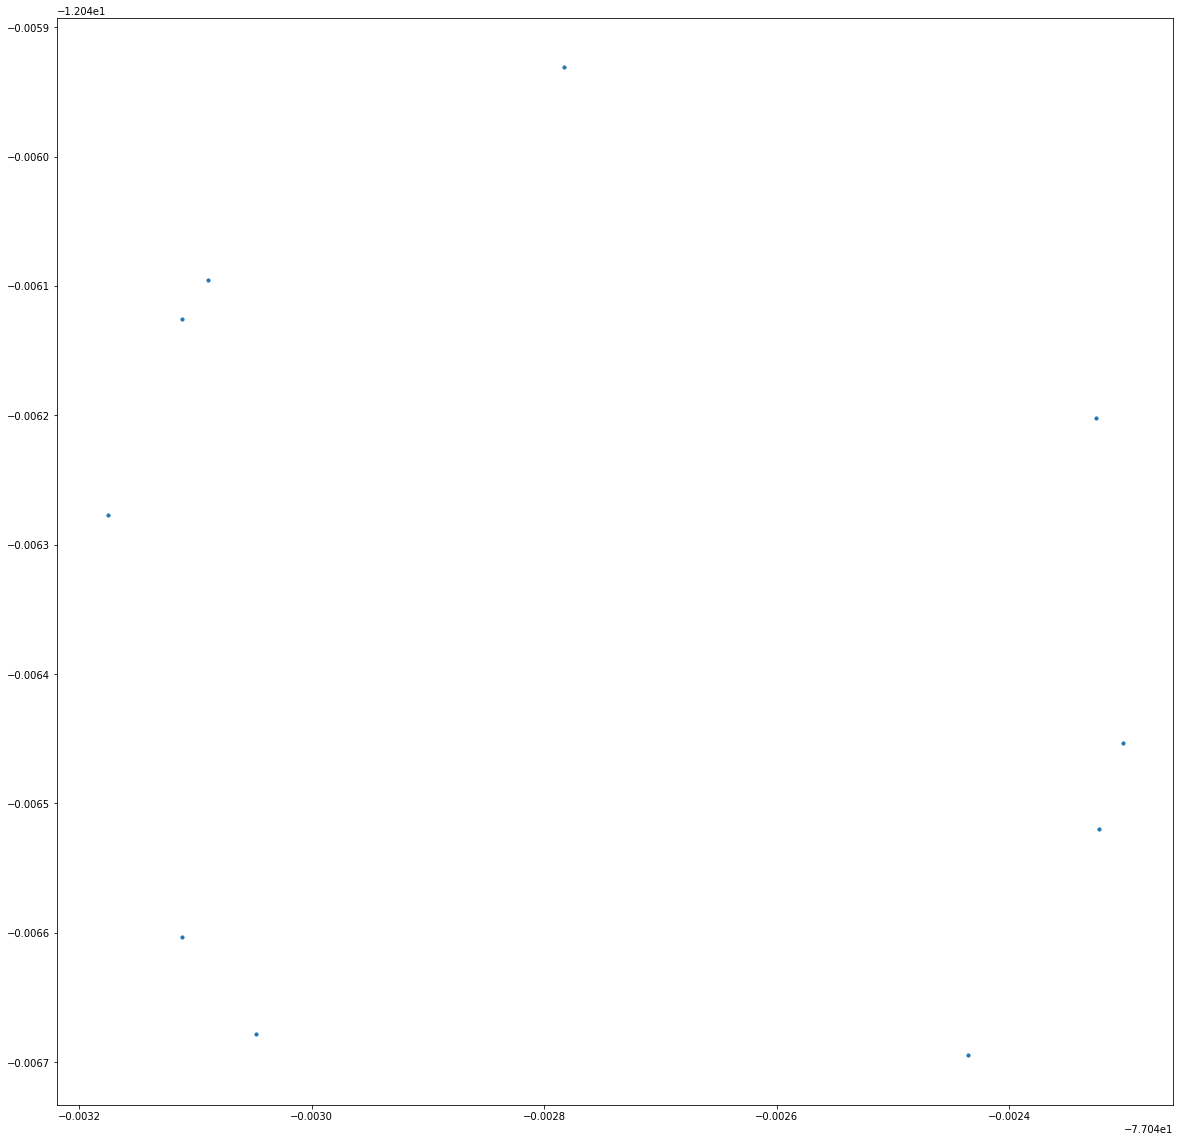

In [14]:
import matplotlib.pyplot as plt


i=0
# x-axis values
x = []
# y-axis values
y = []
a=0
for key in adj1:
  for item in adj1[key]:
    if a<=6:
      if is_integer_num(item)==False:
        if a==0 or a ==2:
          x.append(item)
          
        if a==1 or a==3:
          y.append(item)
        
      a+=1
  a=0



# plotting points as a scatter plot
plt.figure(figsize=(20,20))
                
plt.scatter(x, y,10)
#plt.plot(x,y)

# function to show the plot
plt.show()


Comprobar que se conectan los nodos

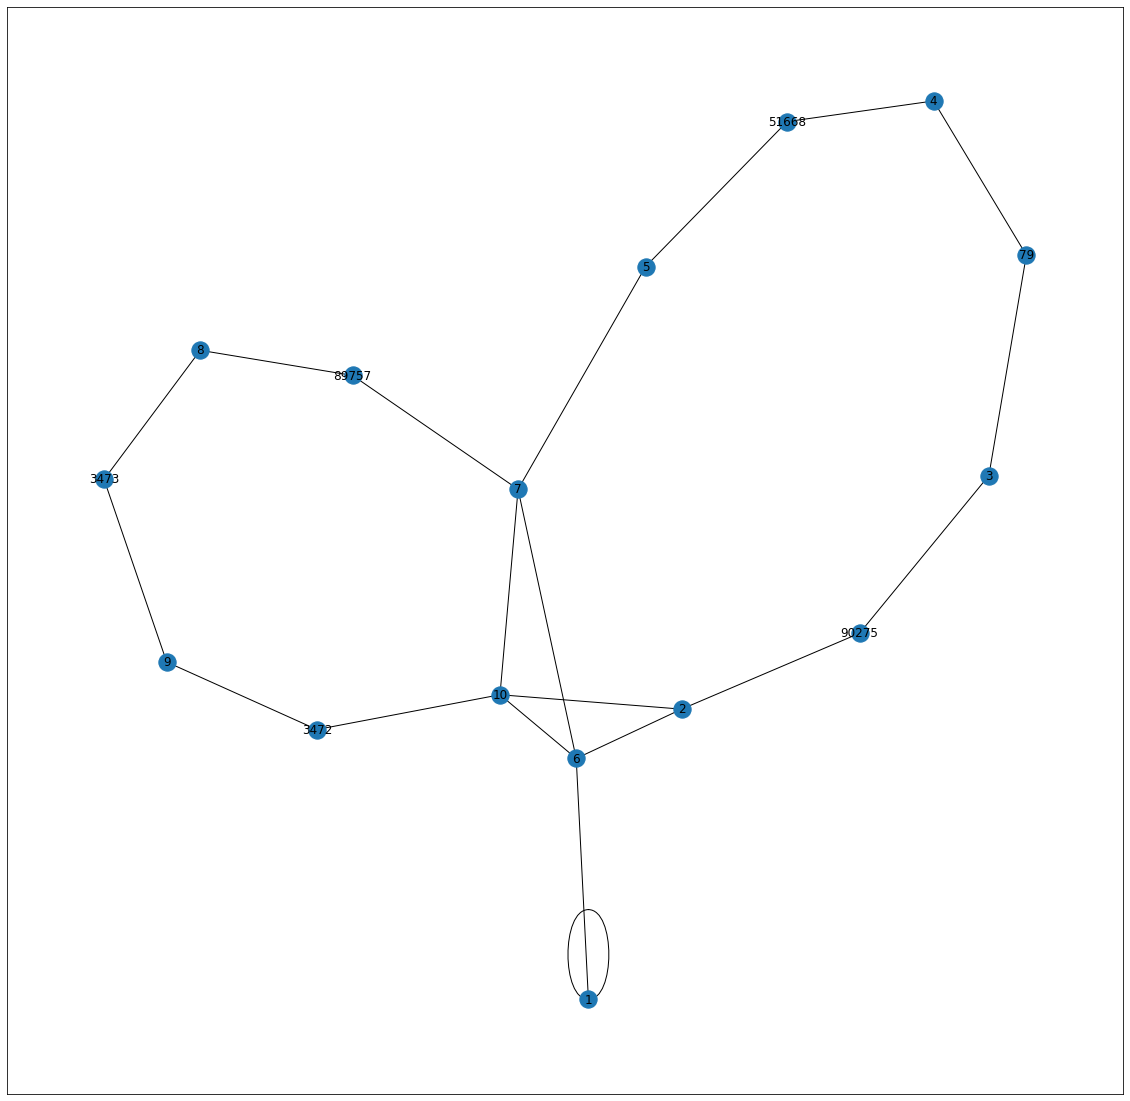

In [15]:
# First networkx library is imported 
# along with matplotlib
import networkx as nx
import matplotlib.pyplot as plt
   
  
# Defining a Class
class GraphVisualization:
   
    def __init__(self):
          
        # visual is a list which stores all 
        # the set of edges that constitutes a
        # graph
        self.visual = []
          
    # addEdge function inputs the vertices of an
    # edge and appends it to the visual list
    def addEdge(self, a, b):
        temp = [a, b]
        self.visual.append(temp)
          
    # In visualize function G is an object of
    # class Graph given by networkx G.add_edges_from(visual)
    # creates a graph with a given list
    # nx.draw_networkx(G) - plots the graph
    # plt.show() - displays the graph
    def visualize(self):
        G = nx.Graph()
        G.add_edges_from(self.visual)
        nx.draw_networkx(G)
        plt.show()
  
# Driver code
plt.figure(figsize=(20,20))
G = GraphVisualization()
for key in adj1:
  for item in adj1[key]:
    if is_integer_num(item)==True and item!=0:
      G.addEdge(key,item)

G.visualize()